In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['outcomes.csv', 'patient_data_4830_hours.csv', 'datasets_og.pickle']


In [3]:
import pandas as pd
import numpy as np
import glob, os, sys
import time
import pickle
import datetime

In [4]:
df = pd.read_csv('../input/patient_data_4830_hours.csv')
df.head(50)

,SUBJECT_ID,TimeStamp,Albumin,Alk. Phosphate,ALT,AST,Total Bili,BUN,Cholesterol,Creatinine,Arterial BP [Diastolic],FiO2 Set,GCS Total,Glucose,HCO3,Hematocrit,Heart Rate,Potassium,Lactic Acid,Arterial BP Mean,MechVent,Magnesium,Sodium,NIDiasABP,NIMAP,NISysABP,Arterial PaCO2,Arterial PaO2,Arterial pH,Platelets,Respiratory Rate,SaO2,Arterial BP [Systolic],Temperature C,TroponinI,TroponinT,Urine,WBC,Previous WeightF
0,17,0 days 00:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.009424,0.220736,1.00,0.25,0.096139,0.0,0.437500,0.440367,0.029630,0.018627,0.279264,0.0,0.018182,0.779661,0.0,0.0,0.0,0.425743,0.640719,0.078020,0.103116,0.143564,0.990099,0.445489,0.0,0.0,0.0,0.0,0.021739,0.0
1,17,1 days 11:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.170569,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.224080,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.0
2,17,1 days 11:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.170569,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.224080,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.0
3,17,1 days 10:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.170569,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.224080,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.188119,0.980198,0.375940,0.0,0.0,0.0,0.0,0.040076,0.0
4,17,1 days 10:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.150502,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.217391,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
5,17,1 days 09:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.150502,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.217391,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
6,17,1 days 09:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.150502,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.217391,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
7,17,1 days 08:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.150502,0.75,1.00,0.095351,0.0,0.476562,0.293578,0.035185,0.018627,0.217391,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.178218,0.980198,0.357143,0.0,0.0,0.0,0.0,0.040076,0.0
8,17,1 days 08:00:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.170569,0.75,1.00,0.095351,0.0,0.476562,0.316514,0.035185,0.018627,0.217391,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.158416,0.980198,0.349624,0.0,0.0,0.0,0.0,0.040076,0.0
9,17,1 days 07:30:00.000000000,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.008377,0.170569,0.75,1.00,0.095351,0.0,0.476562,0.316514,0.035185,0.018627,0.217391,0.0,0.023485,0.774011,0.0,0.0,0.0,0.396040,0.255489,0.082772,0.188427,0.158416,0.980198,0.349624,0.0,0.0,0.0,0.0,0.040076,0.0


In [5]:
matrix3D = np.array(df.drop(['SUBJECT_ID', 'TimeStamp'], 1))
matrix3D

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02173913,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04007561,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04007561,
        0.        ],
       ...,
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01039698,
        0.        ],
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01039698,
        0.        ],
       [0.79032258, 0.        , 0.00204374, ..., 0.        , 0.01342155,
        0.        ]])

In [6]:
matrix3D.shape

(645526, 37)

In [7]:
matrix3D = np.array(matrix3D).reshape((6587, 98, 37))
matrix3D.shape

(6587, 98, 37)

In [8]:
g = []
for k in range(37):
    h = (sum(sum(matrix3D[:,:,k])))
    if int(h)==0:
        g.append(False)
    else:
        g.append(True)
g = np.array(g)
g

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True])

In [9]:
matrix3D = matrix3D[:,:,g]
matrix3D.shape

(6587, 98, 30)

In [10]:
outcomes = pd.read_csv('../input/outcomes.csv')
outcomes.head(10)

,SUBJECT_ID,LABEL
0,17,0
1,21,0
2,23,0
3,34,0
4,36,1
5,61,0
6,68,1
7,85,0
8,94,0
9,103,1


In [11]:
Y = np.array(outcomes.drop(['SUBJECT_ID'], 1))
Y.shape

(6587, 1)

In [12]:
X = matrix3D
X.shape

(6587, 98, 30)

In [13]:
X = np.concatenate((X,X))
X.shape

(13174, 98, 30)

In [14]:
Y = np.concatenate((Y,Y))
Y.shape

(13174, 1)

In [15]:
X = np.concatenate((X,X))
X = np.concatenate((X,X))
X = np.concatenate((X,X))
display(X.shape)
Y = np.concatenate((Y,Y))
Y = np.concatenate((Y,Y))
Y = np.concatenate((Y,Y))
Y.shape

(105392, 98, 30)

(105392, 1)

In [16]:
X_new = X.reshape(X.shape[0],1,X.shape[1],X.shape[2])
X_new.shape

(105392, 1, 98, 30)

In [17]:
Y_new = Y.reshape(Y.shape[0],1,Y.shape[1])
print(Y_new.shape)

(105392, 1, 1)


In [18]:
X_new = np.insert(X_new, 1, Y_new, axis=1)
X_new.shape

(105392, 2, 98, 30)

In [19]:
X_new.shape

(105392, 2, 98, 30)

In [29]:
np.random.shuffle(X_new)
X_new.shape

(105392, 2, 98, 30)

In [30]:
X = X_new[:,0]

X.shape

(105392, 98, 30)

In [31]:
Y = X_new[:,1]
Y = Y[:,0]
Y = Y[:,0]
Y = Y.reshape(Y.shape[0],1)
Y.shape

(105392, 1)

In [32]:
X_train = X[:95000]
X_test = X[95000:]
Y_train = Y[:95000]
Y_test = Y[95000:]
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(95000, 98, 30)

(10392, 98, 30)

(95000, 1)

(10392, 1)

In [33]:
sum(Y_train)

array([35564.])

In [34]:
sum(Y_test)

array([3812.])

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Add
from keras.layers import Dropout,Bidirectional,BatchNormalization,Conv2D,Conv1D

Using TensorFlow backend.


In [36]:
X_tr = X_train.reshape((X_train.shape[0],1,X_train.shape[1],X_train.shape[2]))
X_te = X_test.reshape((X_test.shape[0],1,X_test.shape[1],X_test.shape[2]))
display(X_tr.shape)
X_te.shape

(95000, 1, 98, 30)

(10392, 1, 98, 30)

In [37]:
from keras.layers import Reshape,MaxPooling1D,Conv1D
model8ecw = Sequential()
model8ecw.add(Conv1D(32, kernel_size=5, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh', padding='same',data_format="channels_last"))
model8ecw.add(Conv1D(32, 5, activation='tanh', padding='same'))
model8ecw.add(Conv1D(64, 5, activation='tanh', padding='same'))
model8ecw.add(MaxPooling1D(pool_size=2,data_format="channels_first"))

model8ecw.add(LSTM(100, input_shape=(98, 64),return_sequences=True))
model8ecw.add(Bidirectional(LSTM(25),merge_mode='sum'))
model8ecw.add(Dropout(0.2))
#modelb.add(BatchNormalization(axis=1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model8ecw.add(Dense(100,activation='tanh'))
model8ecw.add(Dense(25,activation='tanh'))
model8ecw.add(Dense(10,activation='tanh'))
model8ecw.add(Dense(1, activation='sigmoid'))
model8ecw.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model8ecw.summary())
history = model8ecw.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,batch_size=1000,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 98, 32)            4832      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 98, 32)            5152      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 98, 64)            10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 98, 100)           53200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 25)                25200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
__________

In [38]:
scores = model8ecw.evaluate(X_test, Y_test)
scores[1]*100

10392/10392 [==============================] - 12s 1ms/step


93.97613548883757

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd;
import numpy as np;
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, f1_score,precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [40]:
y_pred = model8ecw.predict(X_test)

In [41]:
score = 1.0 - roc_auc_score(Y_test, y_pred)



display(score)


f_score=f1_score(Y_test,y_pred.round())

display(f_score)





prfs=precision_recall_fscore_support(Y_test,y_pred.round())


display(prfs)




f_score_micro=f1_score(Y_test,y_pred.round(),average='micro')
f_score_macro=f1_score(Y_test,y_pred.round(),average='macro')

display(f_score_micro)
display(f_score_macro)




cf=confusion_matrix(Y_test,y_pred.round())

display(cf)




print("AUC : "+str(1.0 - score)+",  Score/Loss : "+str(score)+", F1_Score_average: "+str(f_score)+", Precision, Recall, F1_score, Support: "+str(prfs))
print("F1_score_micro: "+str(f_score_micro))
print("F1_score_macro: "+str(f_score_macro))
print("Confusion Matrix")
print(cf)
print("END\n\n")



0.02786353763670646

0.9166444740346206

(array([0.94472662, 0.93077339]),
 array([0.96109422, 0.90293809]),
 array([0.95284014, 0.91664447]),
 array([6580, 3812]))

0.9397613548883756

0.9347423063257327

array([[6324,  256],
       [ 370, 3442]])

AUC : 0.9721364623632935,  Score/Loss : 0.02786353763670646, F1_Score_average: 0.9166444740346206, Precision, Recall, F1_score, Support: (array([0.94472662, 0.93077339]), array([0.96109422, 0.90293809]), array([0.95284014, 0.91664447]), array([6580, 3812]))
F1_score_micro: 0.9397613548883756
F1_score_macro: 0.9347423063257327
Confusion Matrix
[[6324  256]
 [ 370 3442]]
END




{1: 0.9721364623632935}

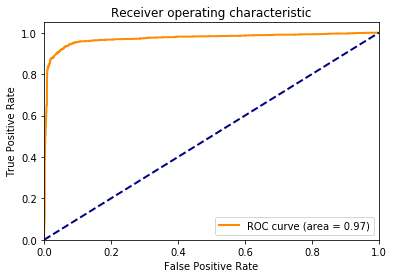

In [42]:



# In[271]:


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[1], tpr[1], _ = roc_curve(Y_test[:, 0], y_pred[:, 0])
roc_auc[1] = auc(fpr[1], tpr[1])


# In[272]:


display(roc_auc)


# In[275]:


plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

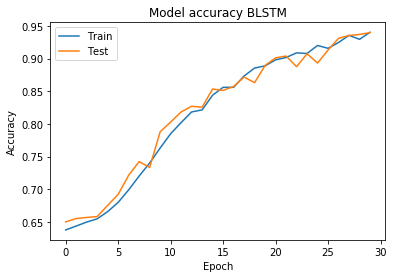

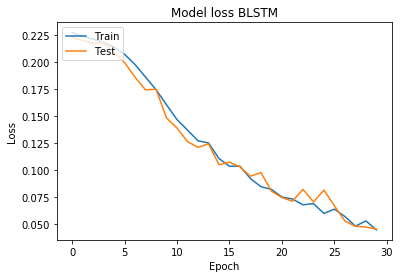

In [43]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy BLSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss BLSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()